In [1]:
from lattice_builder import *
import numpy as np
import scipy
from ODA import *

%matplotlib widget


[=================== ] 99%

# The ODA works best when there are many ommatidia

QhullError: QH6214 qhull input error: not enough points(1) to construct initial simplex (need 4)

While executing:  | qhull v Qz Qbb Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 835068890  voronoi  Qz-infinity-point  Qbbound-last  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  _maxoutside  0


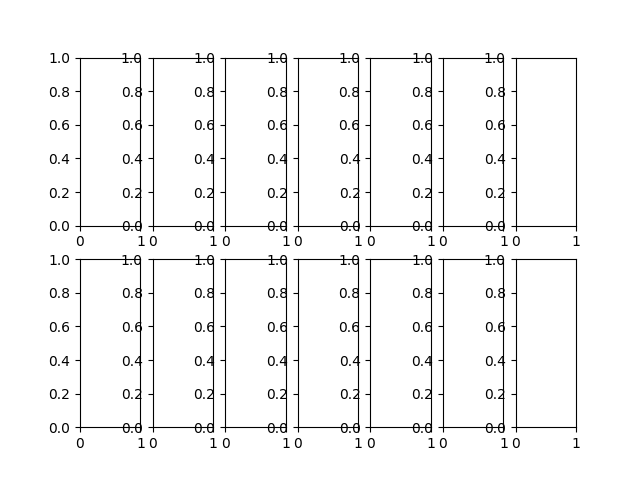

In [2]:

scales = np.logspace(0, 2, 10)[3:][::-1]
fig, axes = plt.subplots(ncols=len(scales), nrows=2)
for scale, row in zip(scales, axes.T):
    lattice = Lattice()
    img = lattice.simulate_eye(scale=scale, xres=150, yres=150)
    row[0].imshow(img, cmap='Greys')
    # apply the ODA to this image and get the lens centers
    mask = np.ones(img.shape, dtype=bool)
    # mask = img > 0
    stack = Eye(arr=img, mask_arr=mask)
    stack.oda()
    ys, xs = stack.ommatidial_inds.T
    row[0].scatter(xs, ys, color='r', marker='.', s=1)
    # plot the reciprocal image too
    row[1].imshow(reciprocal(img), cmap='Greys')
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    sbn.despine(ax=ax, bottom=True, left=True)
plt.tight_layout()
plt.show()

In [ ]:
# scales = np.logspace(0, 2, 10)[3:][::-1]
scale = scales[4]
noise_stds = np.linspace(0, scale/2, 6)
fig, axes = plt.subplots(ncols=6, nrows=2)
for std, row in zip(noise_stds, axes.T):
    lattice = Lattice()
    img = lattice.simulate_eye(scale=scale, xres=150, yres=150, noise_std=std)
    row[0].imshow(img, cmap='Greys')
    # apply the ODA to this image and get the lens centers
    mask = np.ones(img.shape, dtype=bool)
    mask = img > 0
    stack = Eye(arr=img, mask_arr=mask)
    stack.oda(regular=True)
    if len(stack.ommatidial_inds) > 0:
        ys, xs = stack.ommatidial_inds.T
        row[0].scatter(xs, ys, color='r', marker='.', s=5)
    # plot the reciprocal image too
    row[1].imshow(reciprocal(img), cmap='Greys')
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    sbn.despine(ax=ax, bottom=True, left=True)
plt.tight_layout()
plt.show()